In [20]:
from scipy.optimize import minimize
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as minimize
import ad

<H2> Excersice 3 </H2>

<p> For all of the following tasks, we study the following optimization problem: </p>

$$  \min \qquad x_1^2 + x_2^2 + x_1 + 2x_2 $$
$$\text{s.t.} \qquad \qquad x_1 \text{,} x_2 \in R $$

In [8]:
def f(x):
    return x[0]**2 + x[1]**2 + x[0] + 2 * x[1] 

<H4> Task 1 </H4>

<p> In this task we will be impelemnting steepest descent algorithm with using golden section search for optimal step lenght </p>

In [9]:
def golden(a,b,f,L):
    #(Set x as the start point of interval and y as the end point)
    x = a
    y = b
    #(Divide the interval [x,y] in the golden section from the left and right and attain two division points
    #If the greater of the division points has a greater function value 
    #set y as the rightmost division point, because a local optimum is before that)
    while y-x>2*L:  
        left_ratio = y-((math.sqrt(5.0)-1)/2.0)*(y-x)
        right_ratio = x+((math.sqrt(5.0)-1)/2.0)*(y-x)   
        if f(left_ratio) < f(right_ratio):
            y = right_ratio
        #(otherwise:
        #set x as the leftmost division point, because a local optimum is after that)
        else:
            x = left_ratio
    #return midpoint between x and y
    return (x+y)/2

In [161]:

def steepest_descent_golden(f,start,length,precision):
    x = np.array(start)
    func_old = float('Inf')
    d = float('Inf')
    func_new = f(x)
    steplist = []
    while abs(func_old - func_new) > precision:
            func_old = func_new
            # Calculate gradient using finite difference method
            epsilon = 1e-4
            gradient = np.zeros_like(x)
            for i in range(x.shape[0]):
                x_plus = x.copy()
                x_plus[i] += epsilon
                x_minus = x.copy()
                x_minus[i] -= epsilon
                gradient[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
            d = -gradient / np.linalg.norm(gradient)
            # Implementing golden section for optimization of step length
            # Golden section algorithm is the same one used at Exercise 2
            step = golden(0, length, lambda i: f(x + i * d), precision)  
            x = x + d * step # Take a step
            func_new = f(x) # New value
            steplist.append(list(x))
    return x, steplist


In [162]:
start = [-10,10]
precision = 0.0001
(x,steplist) = steepest_descent_golden(f, start, 3, precision)
print ("Min: ", x)

Min:  [-0.50004321 -0.99995007]


<H4> Task 2 </H4>

<p> Plotting the function steps of Steepest descent used in lectures and of the one implementet at task 1</p>

In [163]:
#code from lectures
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(ad.gh(f)[0](x))>precision: # an alternative stopping rule
        f_old = f_new # store value at the current point
        d = -np.array(ad.gh(f)[0](x)) # search direction
        x = x+d*step # take a step
        f_new = f(x) # compute function value at the new point
        steps.append(list(x)) # save step
    return x,f_new,steps

In [164]:
(x1,f_new,steplist1) = steepest_descent(f,start, 0.2, 0.00001)
print ("Min: ", x1)

Min:  [-0.50096482 -0.99888284]


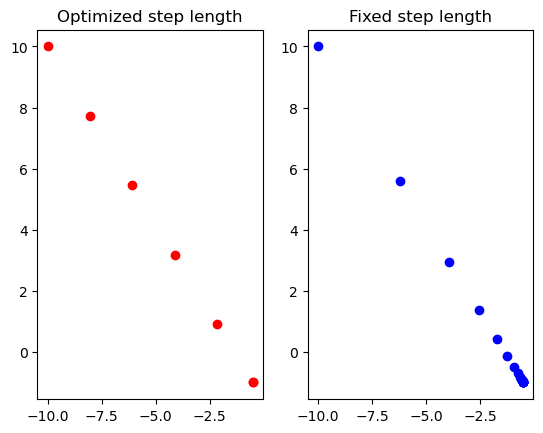

In [166]:
#Plotting functions steps

#Plot of my function from task 1:
plt.subplot(1, 2, 1)
vector = np.array([start] + steplist).transpose()
plt.title("Optimized step length")
plt.plot(vector[0,], vector[1,], 'ro')

#Plot of function from lectures
plt.subplot(1, 2, 2)
vector1 = np.array([start] + steplist1).transpose()
plt.title("Fixed step length")
plt.plot(vector1[0,], vector1[1,], 'bo')

#Red is the one using optimized steps
#Blue is the one using fixed steps that from the lectures
plt.show()

<p> With optimized step length the steps are equally apart from each other (Red dots). With optimized step length we also need to think more about the right maximum step length. </p>
<p> With fixed steps length the dots "move" faster at the start because steps are multiplied with gradient that has different lenghts </p>
<p>  </p>